<font size=5>
$$ S_{i+1}=S_ie^{(\mu-\frac{1}{2}\sigma^2)(t_{i+1}-t_i)+\sigma\sqrt{t_{i+1}-t_i}\xi_i} \text{ where } \xi_i \sim N(0,1)$$
    
The corresponding density function for S(t) is 


$$
f(x)=\frac{\exp{\left(\frac{-(\operatorname{log}(x/S_0)-(\mu-\sigma^2/2)t)^2}{2\sigma^2t}\right)}}{x\sigma\sqrt{2\pi t}}
\text{    , for    } x\ge 0 \tag{6.10}
$$

</font>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
%matplotlib inline

In [18]:
# def random_samples(size=10):
#     return np.random.normal(size=size)

# def transform(random_samples):
#     out=[np.exp((mu-0.5*sigma**2)*delta_t+sigma*np.sqrt(delta_t)*sample) for sample in random_samples]
#     return out

# def get_stock_prices(size=10, simulations=1):
#     stock_price_data=[]
#     for _ in range(simulations):
#         transformed_samples=transform(random_samples(size=size))
#         stock_price_list=[]
#         temp=S_0
#         for sample in transformed_samples:
#             stock_price_list.append(temp)
#             temp=temp*sample
#         stock_price_data.append(stock_price_list)
#     return stock_price_data

# def get_stock_prices(data_points=10, simulations=1, mu=0.05, sigma=0.5, delta_t=0.01):
#     df=pd.DataFrame()
#     for i in range(simulations):
#         df[i]=np.random.normal(size=data_points)
#     df=np.exp((mu-0.5*sigma**2)*delta_t+sigma*np.sqrt(delta_t)*df)
#     df=pd.concat([pd.DataFrame([1]*simulations).transpose(),df], ignore_index=True)
#     df=df.cumprod(axis=0)
#     df=df.iloc[:-1]
#     return df

def get_stock_prices(interval_end=1, mu=0.05, sigma=0.5, delta_t=0.01, simulations=1):
    data_points=(int)(interval_end/delta_t)
    df=pd.DataFrame()
    for i in range(simulations):
        df[i]=np.random.normal(size=data_points)
    df=np.exp((mu-0.5*sigma**2)*delta_t+sigma*np.sqrt(delta_t)*df)
    df=pd.concat([pd.DataFrame([1]*simulations).transpose(),df], ignore_index=True)
    df=df.cumprod(axis=0)
    df=df.iloc[:-1]
    return df


In [34]:
mu=0.005
sigma=0.5
interval_end=1
delta_t=0.001
simulations=10000
# %timeit 
stock_price_data=get_stock_prices(interval_end=interval_end, mu=mu, sigma=sigma, delta_t=delta_t, simulations=simulations)

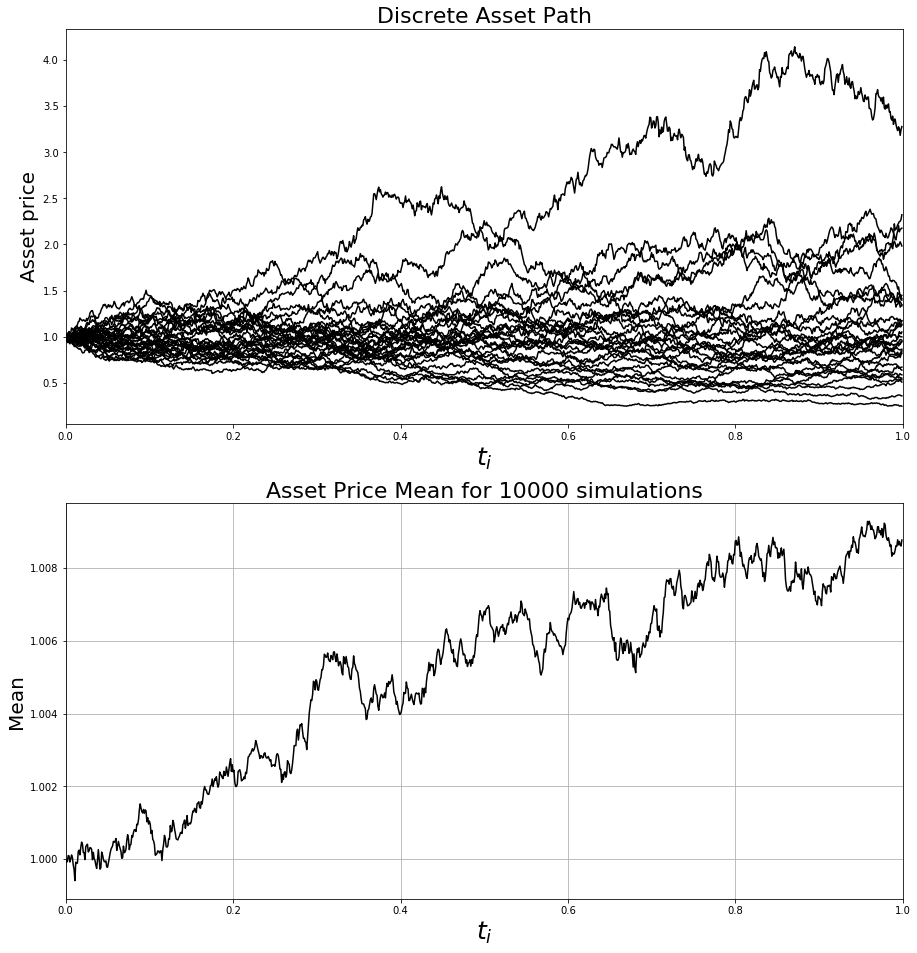

In [35]:
fig, axes=plt.subplots(nrows=2, ncols=1, figsize=(15,16))
axes[0].set_title('Discrete Asset Path',fontsize=22)
axes[0].set_ylabel('Asset price', fontsize=20)
axes[0].set_xlabel('$t_i$',fontsize=25)
axes[0].set_xlim(0,interval_end)
for i in range(30):
    axes[0].plot([s*delta_t for s in list(range(0,(int)(interval_end/delta_t)))], stock_price_data[i], color='black', ls='-')
stock_price_data['mean']=stock_price_data.mean(axis=1)
axes[1].set_title('Asset Price Mean for '+str(simulations)+' simulations',fontsize=22)
axes[1].set_ylabel('Mean', fontsize=20)
axes[1].set_xlabel('$t_i$',fontsize=25)
axes[1].set_xlim(0,interval_end)
# axes[1].set_ylim(1,1.06)
axes[1].plot([s*delta_t for s in list(range(0,(int)(interval_end/delta_t)))], stock_price_data['mean'],color='black', ls='-')
axes[1].grid(True)

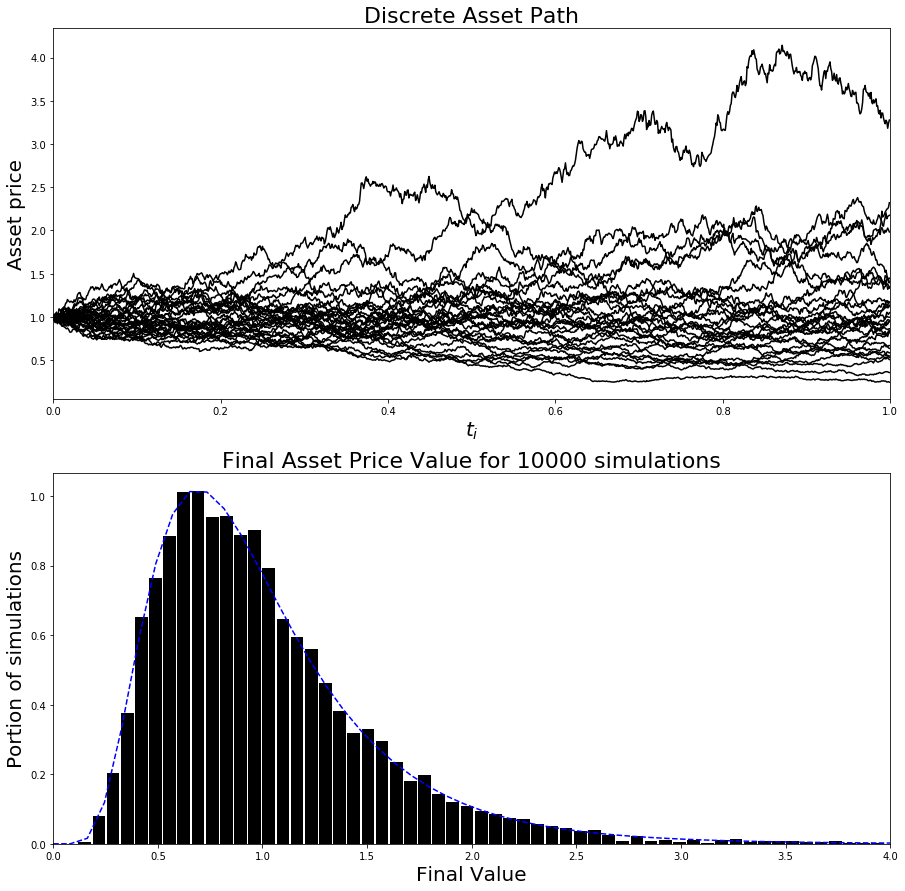

In [36]:
fig,axes=plt.subplots(nrows=2, ncols=1, figsize=(15,15))
axes[0].set_title('Discrete Asset Path',fontsize=22)
axes[0].set_ylabel('Asset price', fontsize=20)
axes[0].set_xlabel('$t_i$',fontsize=20)
axes[0].set_xlim(0,interval_end)
for i in range(30):
    axes[0].plot([s*delta_t for s in list(range(0,(int)(interval_end/delta_t)))], stock_price_data[i], color='black', ls='-')
axes[1].set_title('Final Asset Price Value for '+str(simulations)+' simulations',fontsize=22)
axes[1].set_ylabel('Portion of simulations', fontsize=20)
axes[1].set_xlabel('Final Value',fontsize=20)
axes[1].set_xlim(0,4)
x=np.linspace(0.00001,4)
def func(x):
    return np.exp((-(np.log(x)-(mu-0.5*sigma**2)*interval_end)**2)/(2*sigma**2*interval_end)
                 )/(x*sigma*np.sqrt(2*np.pi*interval_end))
y=func(x)
axes[1].plot(x,y,'b--')
axes[1].hist(stock_price_data.iloc[-1], bins=100 , density=True, rwidth=0.9, color='black')
plt.show()


<font size=5>
SUM OF SQUARE RETURNS
</font>
 
___

<font size=3>

For small $\delta t=t_{i+1}-t_i$ our original discrete model $(6.2)$ assumes that

$$
\frac{S(t_{i+1})-S(t_i)}{S(t_i)}=\mu\delta t+\sigma\sqrt{\delta t}Y_i \tag{7.3}
$$

so the return is a $\mathbf{N}(\mu\delta t, \sigma^2\delta t)$ random variable.
  
Then from $(7.3)$ it is straightforward to show that

$$
\mathrm{E}\left[\left(\frac{S(t_{i+1})-S(t_i)}{S(t_i)}\right)^2\right]=
\sigma^2\delta t + \text{ higher powers of $\delta t$} \tag{7.4}
$$
and
$$
\operatorname{var}\left[\left(\frac{S(t_{i+1})-S(t_i)}{S(t_i)}\right)^2\right]=
2\sigma^4\delta t^2 + \text{ higher powers of $\delta t$} \tag{7.5}
$$

Hence using insight from the Central Limit Theorem, $\sum_{i=0}^{L-1}((S(t_{i+1})-S(t_i))/S(t_i))^2$
should behave like $\mathbf{N}(L\sigma^2\delta t, L2\sigma^4\delta t^2)$, or, $\mathbf{N}(\sigma^2 t, 2\sigma^4t\delta t)$.
This random variable has a variance proportional to $\delta t$, and hence is essentially constant. Thus, although the individual returns are unpredictable, the sum of the squared returns taken over a large number of small intervals is approximately equal to $\sigma^2t$.
</font>

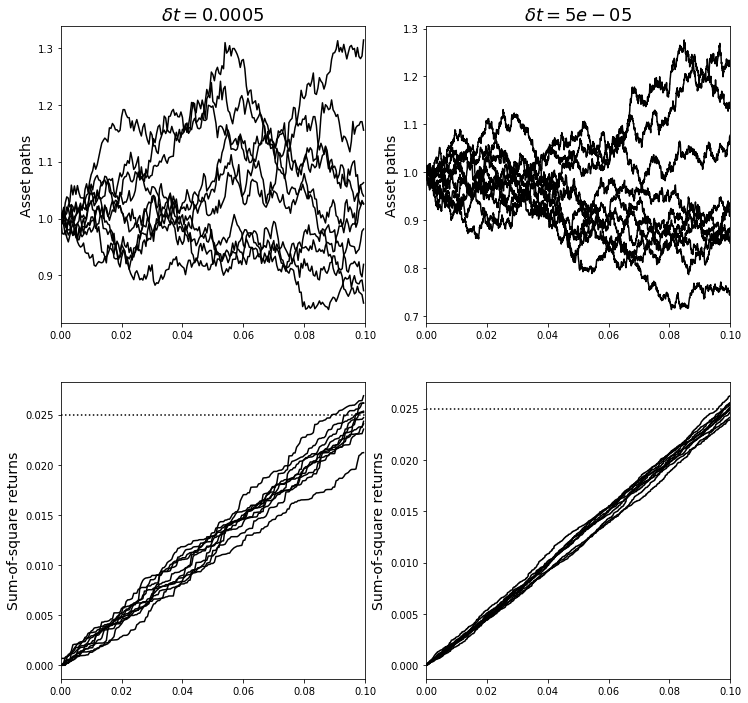

In [37]:
delta_t1=0.0005
delta_t2=0.00005
interval_end1=0.1
interval_end2=0.1
simulations=14
stock_price_data1=get_stock_prices(interval_end=interval_end1, simulations=simulations, delta_t=delta_t1)
stock_price_data2=get_stock_prices(interval_end=interval_end2, simulations=simulations, delta_t=delta_t2)

fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes[0][0].set_xlim([0,interval_end1])
axes[0][1].set_xlim([0,interval_end2])
axes[1][0].set_xlim([0,interval_end1])
axes[1][1].set_xlim([0,interval_end2])

# axes[1][0].set_ylim([0,0.14])
# axes[1][1].set_ylim([0,0.14])

axes[0][0].set_title(r'$\delta t = '+str(delta_t1)+'$', fontsize=18)
axes[0][1].set_title(r'$\delta t = '+str(delta_t2)+'$', fontsize=18)

axes[0][0].set_ylabel('Asset paths', fontsize=14)
axes[0][1].set_ylabel('Asset paths', fontsize=14)
axes[1][0].set_ylabel('Sum-of-square returns', fontsize=14)
axes[1][1].set_ylabel('Sum-of-square returns', fontsize=14)

for i in range(10):
    axes[0][0].plot([s*delta_t1 for s in list(range(0,(int)(interval_end1/delta_t1)))], 
                    stock_price_data1[i], color='black', ls='-')
    axes[0][1].plot([s*delta_t2 for s in list(range(0,(int)(interval_end2/delta_t2)))], 
                    stock_price_data2[i], color='black', ls='-')
    axes[1][0].plot([s*delta_t1 for s in list(range(0,(int)(interval_end1/delta_t1)))], 
                    stock_price_data1[i].pct_change().pow(2).cumsum(axis=0), color='black', ls='-')
    axes[1][1].plot([s*delta_t2 for s in list(range(0,(int)(interval_end2/delta_t2)))], 
                    stock_price_data2[i].pct_change().pow(2).cumsum(axis=0), color='black', ls='-')
axes[1][0].axhline(y=0.5**2*interval_end1, color='black', ls=':')
axes[1][1].axhline(y=0.5**2*interval_end2, color='black', ls=':')
plt.show()